<a href="https://colab.research.google.com/github/PRAVSEN/Predicting_Car_Price/blob/main/Car_Price_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

**Objective is to build a model that determines the key components that drives the price of the car. This involves identifying and quantifying the most influential variables (features) that impact used car prices using statistical analysis and machine learning techniques.The goal is to extract actionable insights and build a model that can generalize well to unseen (test) data.**

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

First Step is to Analyze the data (Cleaning Data):
1. Remove Duplicates. **NOTE**: I did not remove duplicates based on VIN, if i did, that takes away 60% of the data. Infact i dropped the VIN column considering it has incorrect values with duplicate entries.
2. Drop Size columns as it does not have values more than 30%
3. Convert Year to Age
4. Identify Outliers, using Percentile and considering 99% Percentile

Steps for understanding the data (EDA Techniques Used):

1. Univariate Anlaysis - Price Column - Understand its range
2. Analysis on the Other Numerical - Understand their relationship with Price
3. Perform Histograms and Pairplot Analysis on Numerical Columns - Visual Represenation of the relationship between the features with Price
4. Detailed analysis on Categorical Columns and their relationship with the Price Column
5. Correlation Analysis on numerical Columns

In [ ]:
import pandas as pd
df = pd.read_csv('data/vehicles.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

# Understand the Price Column. Identify its Range and Outliers

## Understand the dataframe shape, Filter Outliers, Remove Duplicates and null values

In [ ]:
df.shape
data_clean = df.drop(["size"], axis = 1)
data_clean.isnull().sum()
data_clean = data_clean.drop_duplicates(subset=['VIN'])

# Convert Year to Age
# Get the current year
from datetime import datetime
current_year = datetime.now().year

# Calculate age from year
# Consider Rows with Year greater than zero
data_clean = data_clean[data_clean['year'] >= 0]
data_clean.loc[:, 'age'] = current_year - data_clean['year']

data_clean.info()

data_clean.head()

<class 'pandas.core.frame.DataFrame'>
Index: 117653 entries, 27 to 426833
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            117653 non-null  int64  
 1   region        117653 non-null  object 
 2   price         117653 non-null  int64  
 3   year          117653 non-null  float64
 4   manufacturer  115176 non-null  object 
 5   model         116949 non-null  object 
 6   condition     61081 non-null   object 
 7   cylinders     69683 non-null   object 
 8   fuel          116086 non-null  object 
 9   odometer      116079 non-null  float64
 10  title_status  114142 non-null  object 
 11  transmission  116417 non-null  object 
 12  VIN           117653 non-null  object 
 13  drive         90470 non-null   object 
 14  type          101499 non-null  object 
 15  paint_color   87013 non-null   object 
 16  state         117653 non-null  object 
 17  age           117653 non-null  float64
dtypes: float

id  region  price    year manufacturer  \
27  7316814884  auburn  33590  2014.0          gmc   
28  7316814758  auburn  22590  2010.0    chevrolet   
29  7316814989  auburn  39590  2020.0    chevrolet   
30  7316743432  auburn  30990  2017.0       toyota   
32  7316343444  auburn  27990  2012.0          gmc   

                          model condition    cylinders fuel  odometer  \
27     sierra 1500 crew cab slt      good  8 cylinders  gas   57923.0   
28               silverado 1500      good  8 cylinders  gas   71229.0   
29          silverado 1500 crew      good  8 cylinders  gas   19160.0   
30         tundra double cab sr      good  8 cylinders  gas   41124.0   
32  sierra 2500 hd extended cab      good  8 cylinders  gas   68696.0   

   title_status transmission                VIN drive    type paint_color  \
27        clean        other  3GTP1VEC4EG551563   NaN  pickup       white   
28        clean        other  1GCSCSE06AZ123805   NaN  pickup        blue   
29        clean        other  3GCPWCED5LG130317   NaN  pickup         red   
30        clean        other  5TFRM5F17HX120972   NaN  pickup         red   
32        clean        other  1GT220CG8CZ231238   4wd  pickup       black   

   state   age  
27    al  11.0  
28    al  15.0  
29    al   5.0  
30    al   8.0  
32    al  13.0

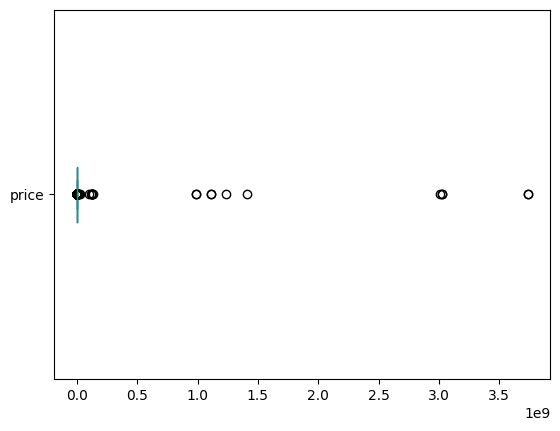

In [ ]:
# understand the outliers of the price column

df["price"].plot(kind = "box", vert= False);

# Understand the Percentile values for Price and Filter the Price Column range

In [ ]:
# Filter the outliers consider 99% percentile range of data

data_clean['price'].describe(percentiles=[0.10, 0.20, 0.80, 0.85, 0.95, 0.999]).astype('int')

percentile_99 = data_clean['price'].quantile(0.999)
percentile_10 = data_clean['price'].quantile(0.10)

data_clean = data_clean[(data_clean['price'] <= percentile_99) & (data_clean['price'] >= percentile_10)]

data_clean = data_clean.dropna()

data_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 31585 entries, 32 to 426833
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            31585 non-null  int64  
 1   region        31585 non-null  object 
 2   price         31585 non-null  int64  
 3   year          31585 non-null  float64
 4   manufacturer  31585 non-null  object 
 5   model         31585 non-null  object 
 6   condition     31585 non-null  object 
 7   cylinders     31585 non-null  object 
 8   fuel          31585 non-null  object 
 9   odometer      31585 non-null  float64
 10  title_status  31585 non-null  object 
 11  transmission  31585 non-null  object 
 12  VIN           31585 non-null  object 
 13  drive         31585 non-null  object 
 14  type          31585 non-null  object 
 15  paint_color   31585 non-null  object 
 16  state         31585 non-null  object 
 17  age           31585 non-null  float64
dtypes: float64(3), int64(2), obje

# Understand the mean, std and percentile

In [ ]:
# understand the stats of the data and numeric features

data_clean.describe().round(2).astype('int')


id   price   year  odometer    age
count       31585   31585  31585     31585  31585
mean   7312139954   14666   2010    107222     14
std       4172156   12252      7    117343      7
min    7301588247       0   1905         0      3
25%    7309471615    6499   2008     63930     10
50%    7313493779   10999   2012    103800     13
75%    7315490676   19500   2015    141834     17
max    7317098990  110000   2022   9999999    120

# Understand the Correlationship between numerical columns

In [ ]:
data_clean[["price", "odometer", "age"]].corr()


price  odometer       age
price     1.000000 -0.226623 -0.297635
odometer -0.226623  1.000000  0.203733
age      -0.297635  0.203733  1.000000

Histogram below shows the relationship of numerical columns with Price

As Age increases, Price decrease. This is same with the odometer

# Understand the variance for numerical feature using Histogram

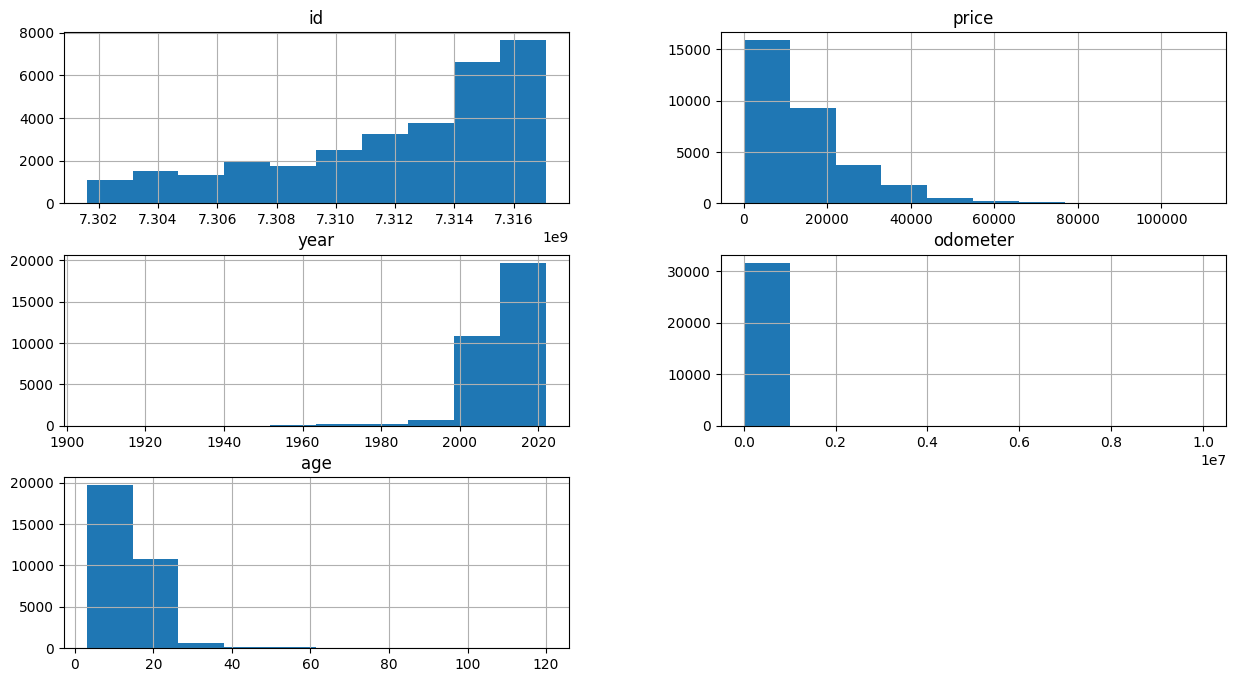

In [ ]:
# understand the data variance for each numerical feature
import matplotlib.pyplot as plt
hist = data_clean.hist(figsize = (15,8));

plt.savefig("images/hist_output.png", dpi=300, bbox_inches='tight')

# Understand the relationship between the features

There is a negative linear relationship between Price, Age and Odometer

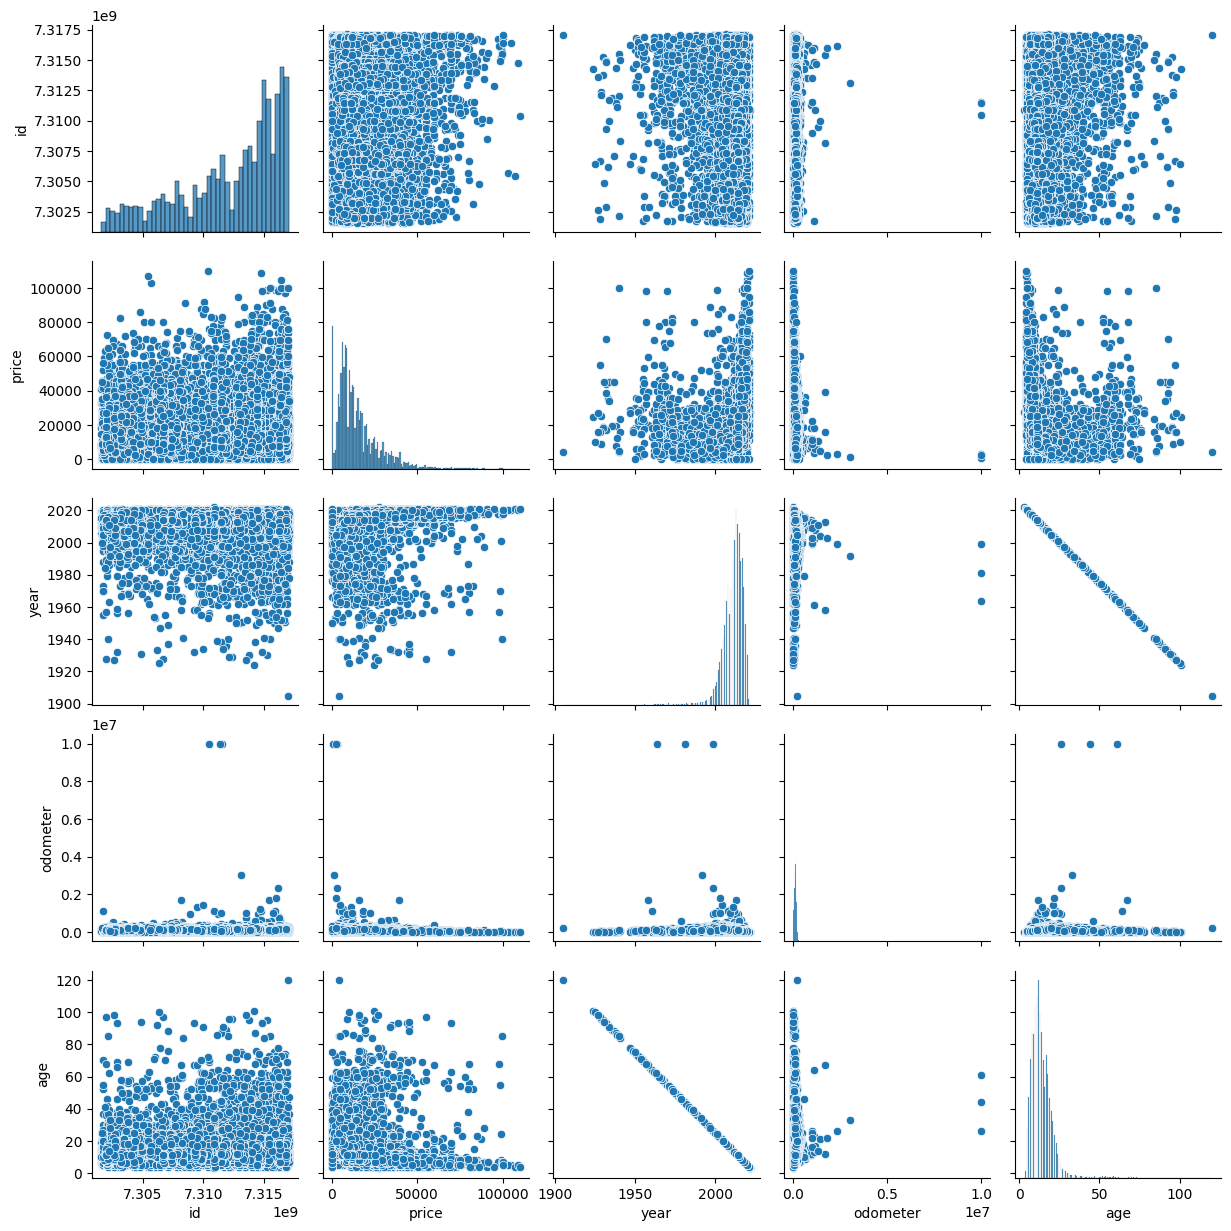

In [ ]:
import seaborn as sns
pair = sns.pairplot(data_clean)

pair.savefig("images/pairplot_output.png", dpi=300, bbox_inches='tight')

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

# Visualize the missing values

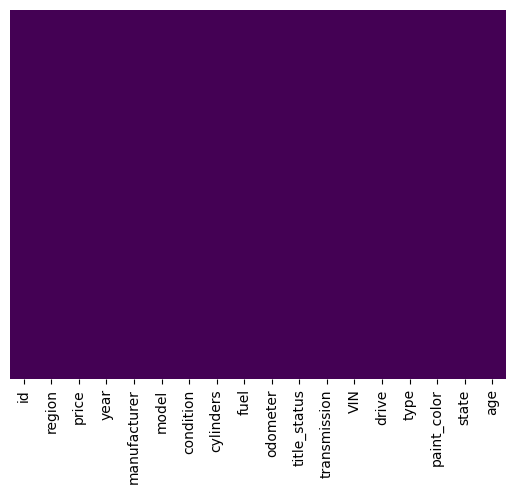

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data_clean.isnull(), cbar=False, cmap='viridis', yticklabels=False)

plt.savefig("images/heatmap.png", dpi=300)

# Detailed Categorical Column Analysis

Use One hot Encoding Techniques converting categorical to numerical columns

In [ ]:
# Identify unique values in them, This informs us the the model values has too many category values. This will render too many dimensions to the data causing overfitting
# This may the case with Region as well. For State specific analysis we could keep the State value and discard the Region
# VIN field is supposed to be unique and has no impact over price

df_clean_object = data_clean


cat_columns = df_clean_object.select_dtypes(["object"]).columns.tolist()
df_clean_object[cat_columns].agg(['nunique'])

cat_columns = ["manufacturer", "condition", "cylinders", "fuel", "drive", "transmission", "title_status"]

for i in cat_columns:
    display(df_clean_object.groupby(i)["price"].agg(["mean", "median", "count"]).round(2))


# Converting Cylinder column to numeric
df_clean_object['cylinders_numeric'] = (
   pd.to_numeric(df_clean_object['cylinders'].str.extract(r'(\d+)')[0], errors='coerce')
   .fillna(-1)
   .astype(int)
)


# Use Onehot Encoding Technique to create dummies for condition_numeric
condition_numeric_dummies = pd.get_dummies(df_clean_object['condition'], prefix='condition').astype(int)
df_clean_object = pd.concat([df_clean_object, condition_numeric_dummies], axis=1)


# Use Onehot Encoding Technique to create dummies for title_status
title_status_dummies = pd.get_dummies(df_clean_object['title_status'], prefix='title_status').astype(int)
df_clean_object = pd.concat([df_clean_object, title_status_dummies], axis=1)

# Use Onehot Encoding Technique to create dummies for Fuel
fuel_dummies = pd.get_dummies(df_clean_object['fuel'], prefix='fuel').astype(int)
df_clean_object = pd.concat([df_clean_object, fuel_dummies], axis=1)


# Use Onehot Encoding Technique to create dummies for Tramission
transmission_dummies = pd.get_dummies(df_clean_object['transmission'], prefix='transmission').astype(int)
df_clean_object = pd.concat([df_clean_object, transmission_dummies], axis=1)


# Use Onehot Encoding Technique to create dummies for drive
drive_dummies = pd.get_dummies(df_clean_object['drive'], prefix='drive').astype(int)
df_clean_object = pd.concat([df_clean_object, drive_dummies], axis=1)

# Viewing the table
# df_clean_object.info()

mean   median  count
manufacturer                             
acura            13505.62  10995.0    339
alfa-romeo       21510.92  25997.0     13
aston-martin     50925.00  50925.0      2
audi             16328.67  13999.0    455
bmw              15324.35  12600.0    946
buick            11120.38   8995.0    437
cadillac         16930.05  13995.0    484
chevrolet        16098.32  12777.0   4293
chrysler          9630.88   7990.0    607
datsun           17479.80  18500.0      5
dodge            13961.22  10172.0   1070
ferrari          54203.00  44150.0      5
fiat              8395.61   7499.5     66
ford             17113.69  12995.0   5161
gmc              19672.64  15999.0   1162
harley-davidson  18634.80  19995.0      5
honda             9959.81   8500.0   2053
hyundai           9788.55   8898.0    875
infiniti         17659.39  17544.5    326
jaguar           14608.02   9995.0    101
jeep             16722.28  15495.0   1474
kia               9935.89   8995.0    689
land rover        3950.00   3950.0      1
lexus            16256.96  12900.0    671
lincoln          14209.76  10995.0    276
mazda             9264.05   7895.0    457
mercedes-benz    17063.22  13997.0    847
mercury           5395.60   4900.0    103
mini              9476.75   7995.0    176
mitsubishi        9905.24   7900.0    192
nissan           11455.51   9500.0   1760
pontiac           8817.78   5950.0    231
porsche          31234.63  25000.0    133
ram              24347.37  22997.0   1043
rover            23072.45  19999.0    128
saturn            5077.18   4698.5    102
subaru           11349.11   9995.0    949
tesla            46922.59  39990.0     17
toyota           13088.47   9919.0   2930
volkswagen       10728.27   9400.0    747
volvo            10606.00   7500.0    254

mean   median  count
condition                          
excellent  14299.56  11490.0  17057
fair        4141.16   3000.0    531
good       14390.41  10000.0  10773
like new   19191.68  15797.5   3034
new        24465.04  15599.5    152
salvage     4514.47   2600.0     38

mean   median  count
cylinders                             
10 cylinders  13000.50  10900.0    173
12 cylinders  18756.93   9980.0     15
3 cylinders   11378.22   9995.0     63
4 cylinders   10564.13   8995.0  11685
5 cylinders    8185.67   6900.0    280
6 cylinders   15055.52  11599.0  11504
8 cylinders   20518.32  16995.0   7778
other         17023.36  10500.0     87

mean   median  count
fuel                              
diesel    29498.05  26967.5   1358
electric  19721.46  13249.5     90
gas       13914.36  10988.0  29257
hybrid    11056.19   8993.5    430
other     21271.93  20590.0    450

mean   median  count
drive                          
4wd    18200.47  14990.0  13329
fwd     9751.34   7998.0  12201
rwd    16793.09  13900.0   6055

mean   median  count
transmission                          
automatic     14060.56  10990.0  28396
manual        13685.60   9472.5   1768
other         28003.14  28990.0   1421

mean   median  count
title_status                          
clean         14709.70  10999.0  30372
lien          22480.97  17999.0    157
missing        3739.29   2950.0     14
parts only     3468.75   1937.5      4
rebuilt       12909.08  10995.0    785
salvage       10909.02   8999.0    253

# Visual Analysis of Categorical Columns and its Relationship on Price

1. New and Good Condition Cars have positive relationship with price
2. Cylinder, have positive relationship the price values
3. Diesel and Electric cars have higher prices
4. 4WD hve higher price
5. Automatic Tramission cars are higher price range compared to the manual

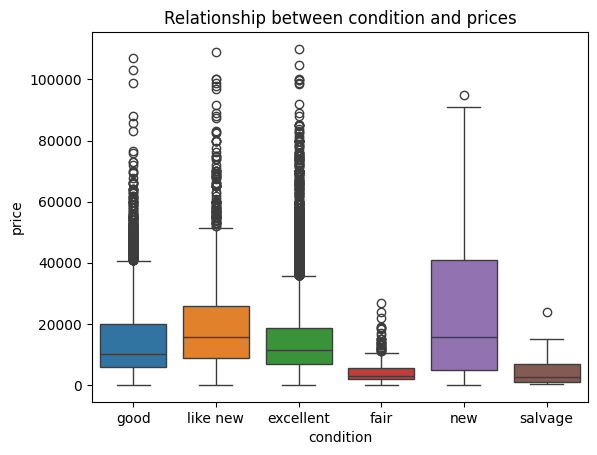

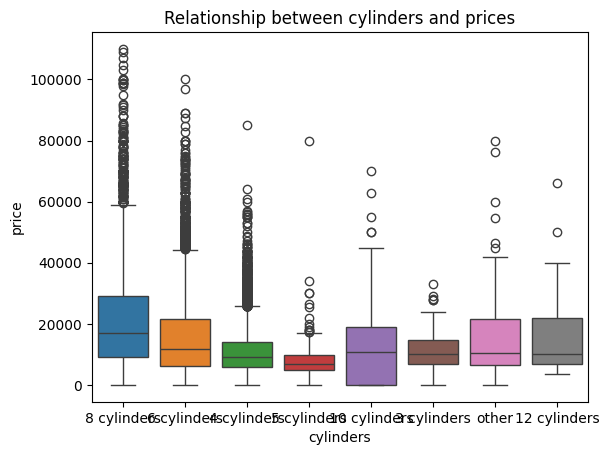

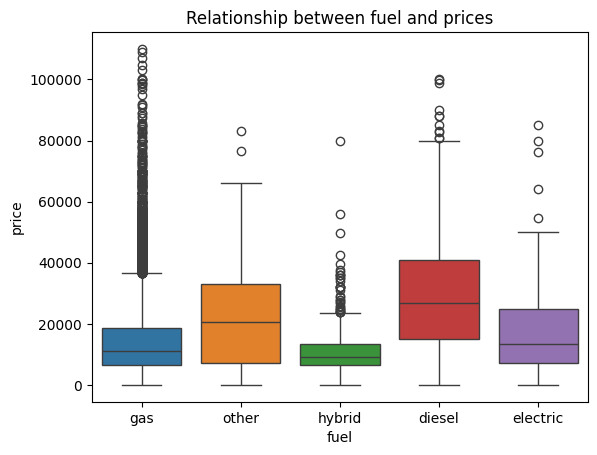

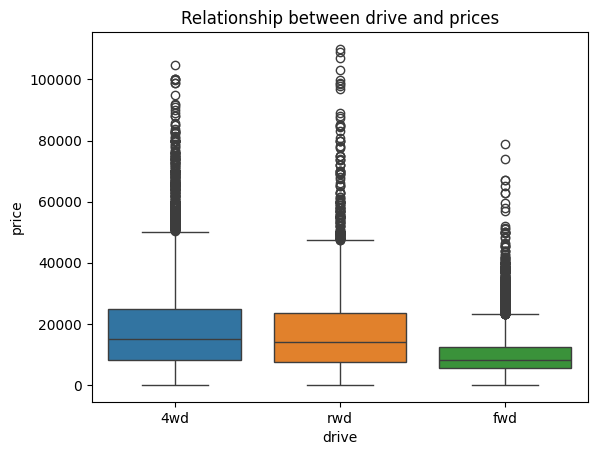

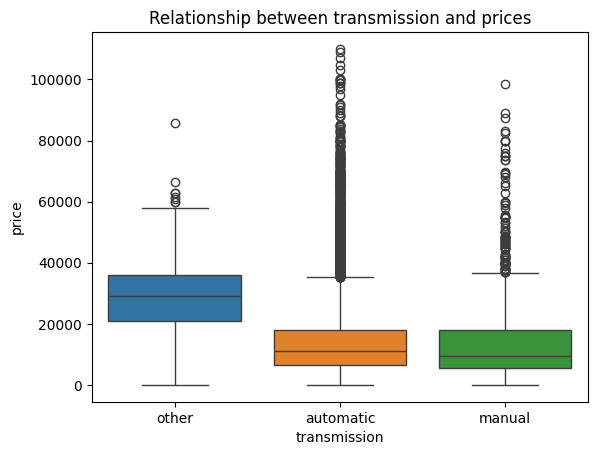

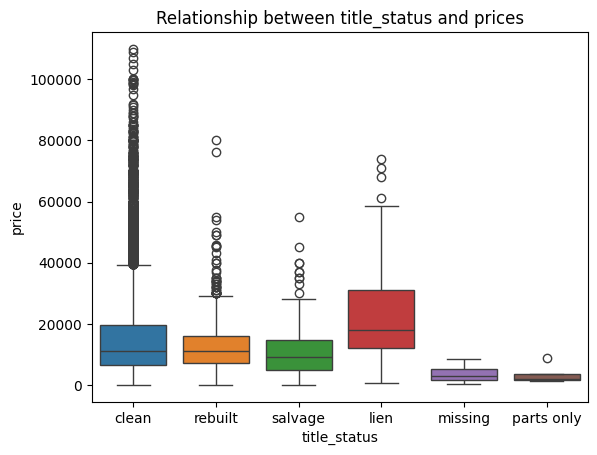

In [ ]:
# removing Manufacturer and model
# These plots helps us to understand the relationship between the categorical columns vs price
import seaborn as sns
import matplotlib.pyplot as plt

cat_columns = ["condition", "cylinders", "fuel", "drive", "transmission", "title_status"]

for i in cat_columns:
    sns.boxplot(x = i, y = "price", hue= i, data = data_clean)
    plt.title(f"Relationship between {i} and prices")
    plt.savefig(f"images/boxplot_{i}.png", dpi=300)
    plt.show();


# Dimensional Reduction - Analysis and Inference

## The Elbow Chart provide us the details on the number of dimensions that are optimal for the analysis.  The value come to 6

<class 'pandas.core.frame.DataFrame'>
Index: 31585 entries, 32 to 426833
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       31585 non-null  int64  
 1   price                    31585 non-null  int64  
 2   year                     31585 non-null  float64
 3   odometer                 31585 non-null  float64
 4   age                      31585 non-null  float64
 5   cylinders_numeric        31585 non-null  int64  
 6   condition_excellent      31585 non-null  int64  
 7   condition_fair           31585 non-null  int64  
 8   condition_good           31585 non-null  int64  
 9   condition_like new       31585 non-null  int64  
 10  condition_new            31585 non-null  int64  
 11  condition_salvage        31585 non-null  int64  
 12  title_status_clean       31585 non-null  int64  
 13  title_status_lien        31585 non-null  int64  
 14  title_status_missing     

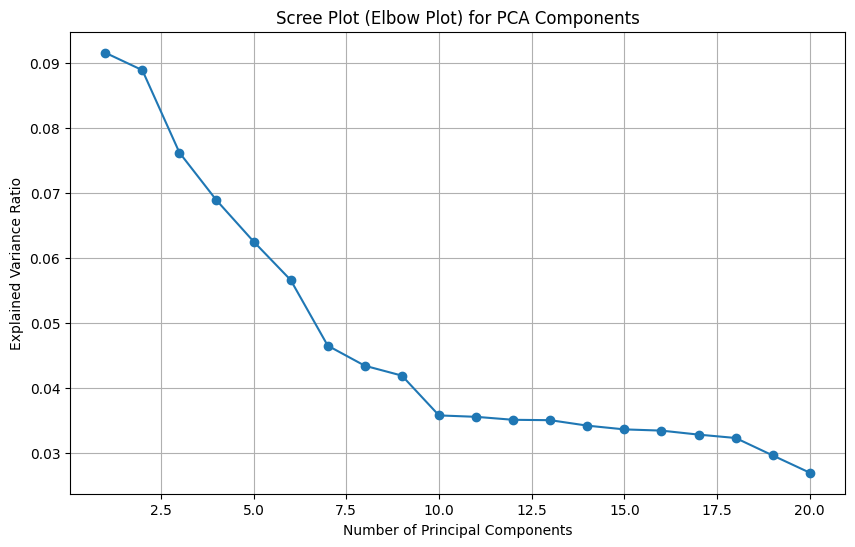

In [ ]:
# Dimensonality Reduction

# Dropping non-numeric columns
object_cols = df_clean_object.select_dtypes('object').columns.tolist()
object_cols
df_clean_object = df_clean_object.drop(object_cols, axis = 1)
df_clean_numeric = df_clean_object.dropna()
df_clean_numeric.info()

# Scaling the data
df_scaled = (df_clean_numeric - df_clean_numeric.mean())/df_clean_numeric.std()
df_scaled.shape

# Perform Dimensionality Reduction using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=20, random_state=42)
components = pca.fit_transform(df_scaled)

explained_variance_ratio = pca.explained_variance_ratio_

# Printing the Components
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot (Elbow Plot) for PCA Components')
plt.grid(True)
plt.savefig("images/pca_plot.png", dpi=300)
plt.show()

# Inference from the Plot below signifies that 5 is the ideal features (dimensions) number that we want to go with.
# The model below helps us to reduce the dimensions so that we only care about the once that has a very high impact on the price starting from Price to Condition.
# We will ignore Id column as that does not hold any value

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

# Choosing LinearRegression, Lasso and Ridge for Analysis

### Splitting the Data into Training/Test Choosing 70/30 split
### Scale the data using Standard Scalar
####  1. Providing Density Plot to verify the Scaled Date
####  2. Scaled Data Mean and Std values hold 0 and 1 confirming the data has been scaled properly

In [ ]:
import pandas as pd
import numpy as np

from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV

# X = df_clean_numeric[['odometer', 'age', 'cylinders_numeric', 'condition_excellent', 'condition_fair', 'condition_good', 'condition_new', 'condition_like new', 'condition_salvage']]
X = df_clean_numeric.drop(['price','year'], axis=1)
# X = df_clean_numeric[['odometer', 'age']]
y = df_clean_numeric[['price']]


# Split the Data

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(22109, 27)
(22109, 1)
(9476, 27)
(9476, 1)




# Applying The Polynomial Features Transformer for Non Linear Relations


In [ ]:
# Apply Polynomial Feature Tranformer with ideal degree 3, value

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Create a pipeline with polynomial transformation and linear regression
model = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),
    ('linear', LinearRegression())
])

# Fit the model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
# model.named_steps['linear'].coef_

# Scaling the Data

## Scaling after polynomial transformation ensures all features (original and generated) are on a similar scale, which is important for models like linear regression, ridge, and lasso

In [ ]:
# Scaling the Data (Ignore dtype future warnings)
# Displaing the density plot to confirm the Scaling on these features


import warnings

# creating the scaled version which will be updated
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# intiate the Standard Scaler
scale = StandardScaler()

# Suppress FutureWarnings during assignment
with warnings.catch_warnings():
  warnings.simplefilter("ignore", FutureWarning)

  # Fit transform on the train data
  X_train_scaled[:] = scale.fit_transform(X_train[:])

  # Transform the test data
  X_test_scaled[:] = scale.transform(X_test[:])


In [ ]:
# X_train.plot(kind = 'kde', subplots = True,figsize = (15,8));

In [ ]:
# X_train_scaled.plot(kind = 'kde', subplots = True,figsize = (15,8));

In [ ]:
X_train.agg(["mean", "std"]).round(1)


# This data of the model before scaling

id  odometer   age  cylinders_numeric  condition_excellent  \
mean  7.312141e+09  106936.7  14.1                5.7                  0.5   
std   4.162542e+06   95522.9   7.3                1.6                  0.5   

      condition_fair  condition_good  condition_like new  condition_new  \
mean             0.0             0.3                 0.1            0.0   
std              0.1             0.5                 0.3            0.1   

      condition_salvage  ...  fuel_electric  fuel_gas  fuel_hybrid  \
mean                0.0  ...            0.0       0.9          0.0   
std                 0.0  ...            0.1       0.3          0.1   

      fuel_other  transmission_automatic  transmission_manual  \
mean         0.0                     0.9                  0.1   
std          0.1                     0.3                  0.2   

      transmission_other  drive_4wd  drive_fwd  drive_rwd  
mean                 0.0        0.4        0.4        0.2  
std                  0.2        0.5        0.5        0.4  

[2 rows x 27 columns]

In [ ]:
X_train_scaled.agg(["mean", "std"]).round(1)

# This confirms the model has scaled properly the values of Mean is 0 and Std is 1

id  odometer  age  cylinders_numeric  condition_excellent  \
mean -0.0       0.0  0.0                0.0                 -0.0   
std   1.0       1.0  1.0                1.0                  1.0   

      condition_fair  condition_good  condition_like new  condition_new  \
mean            -0.0            -0.0                 0.0            0.0   
std              1.0             1.0                 1.0            1.0   

      condition_salvage  ...  fuel_electric  fuel_gas  fuel_hybrid  \
mean               -0.0  ...            0.0       0.0         -0.0   
std                 1.0  ...            1.0       1.0          1.0   

      fuel_other  transmission_automatic  transmission_manual  \
mean         0.0                     0.0                 -0.0   
std          1.0                     1.0                  1.0   

      transmission_other  drive_4wd  drive_fwd  drive_rwd  
mean                 0.0       -0.0        0.0        0.0  
std                  1.0        1.0        1.0        1.0  

[2 rows x 27 columns]

# To Predict the Car Price Value,

Starting off with using Alpha as 1 for Ridge and Lasso and compare the results

In [ ]:
models = {
    'Linear': LinearRegression(),
    'Ridge (α=200)': Ridge(alpha = 200),
    'Lasso (α=200)': Lasso(alpha = 200)
}

In [ ]:
# create copies of train and test to store predictions
y_train_pred = y_train.copy()
y_test_pred = y_test.copy()

# Runnign a for loop to fit all the models within a single function

In [ ]:
results = {}

for name, model in models.items():

    # fit the model
    model.fit(X_train_scaled, y_train)

    # train predictions
    y_pred_train = model.predict(X_train_scaled)

    # test predictions
    y_pred_test = model.predict(X_test_scaled)

    # add another key to the dictionary
    results[name] = {
        'Train RMSE': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'Test RMSE': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'Coefficients': model.coef_
        }
    # add in the dataframe
    y_train_pred[name] = model.predict(X_train_scaled)
    y_test_pred[name] = model.predict(X_test_scaled)

# Visualize and Compare the Results

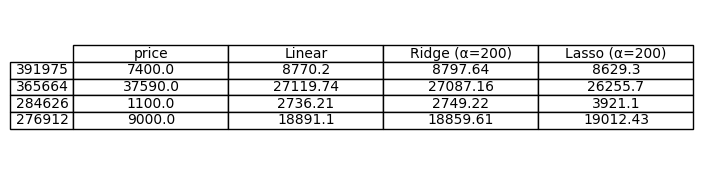

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
preview = y_train_pred.head(4).round(2)
# Initialize figure and axes
fig, ax = plt.subplots(figsize=(8, 2))
ax.axis('off')  # Turn off the axis
pd.plotting.table(ax, preview, loc='center', cellLoc='center')
plt.savefig("images/Alpha200.png", bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
y_train_pred.sort_index().plot(kind = 'line', backend = 'plotly', title = "Train data performance")

In [ ]:
y_test_pred.sort_index().plot(kind = 'line', backend = 'plotly', title = "Test Data Performance")

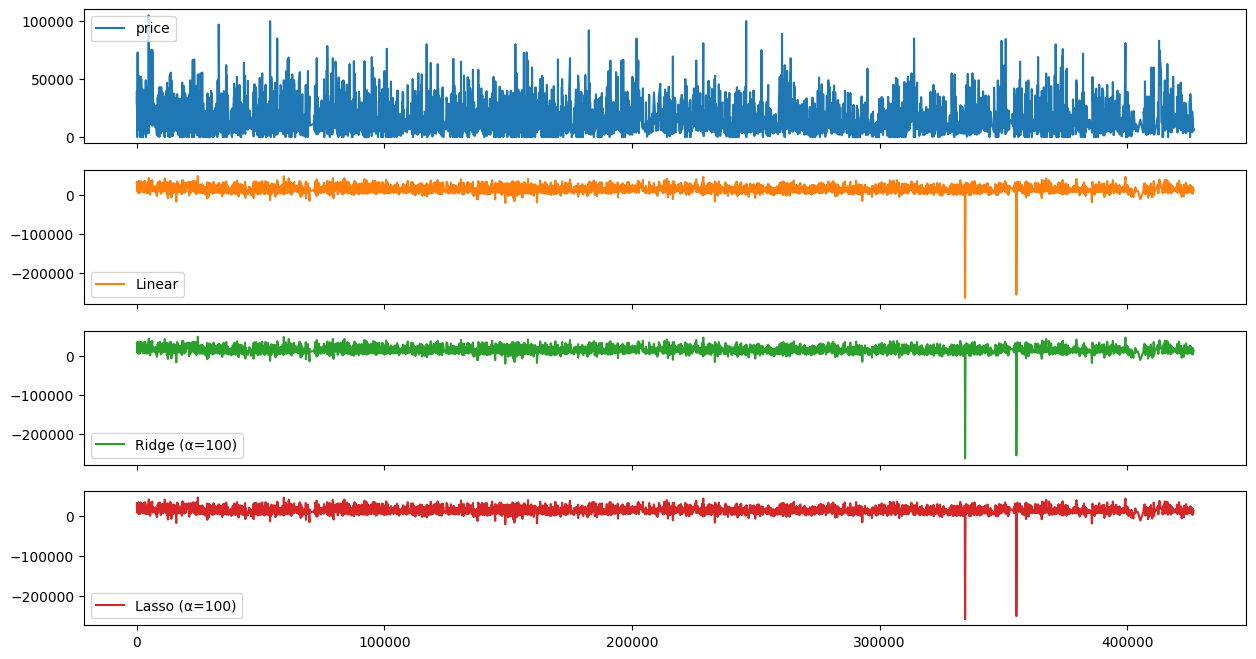

In [ ]:
y_test_pred.sort_index().plot(kind = 'line', figsize = (15,8), subplots = True);

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

# Visualize and compare the Root Mean Square Error between the Models

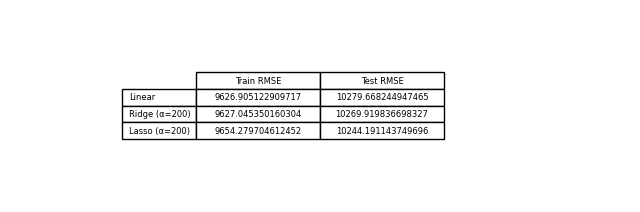

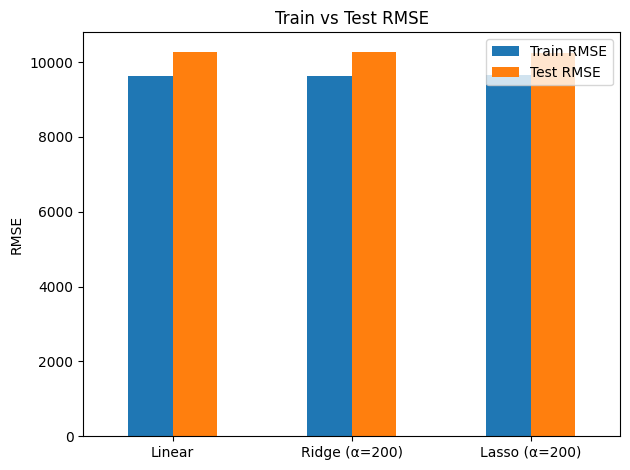

Train RMSE     Test RMSE
Linear         9626.905123  10279.668245
Ridge (α=200)   9627.04535  10269.919837
Lasso (α=200)  9654.279705  10244.191144

In [ ]:
rmse_df = pd.DataFrame(results).T[['Train RMSE', 'Test RMSE']]

# Set up the figure
fig, ax = plt.subplots(figsize=(8, len(rmse_df) * 0.5 + 1))  # Height adjusts to number of rows
ax.axis('off')  # No axes
# Add the table
table = pd.plotting.table(ax, rmse_df, loc='center', cellLoc='center', colWidths=[0.2]*len(rmse_df.columns))
plt.savefig("images/rmse_train_vs_test_alpha200_table.png", bbox_inches='tight', dpi=300)
plt.show()

rmse_df.plot(kind='bar', title='Train vs Test RMSE')
plt.ylabel("RMSE")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("images/rmse_train_vs_test_alpha200.png", dpi=300)
plt.show()
rmse_df

In [ ]:
X_train.columns

Index(['id', 'odometer', 'age', 'cylinders_numeric', 'condition_excellent',
       'condition_fair', 'condition_good', 'condition_like new',
       'condition_new', 'condition_salvage', 'title_status_clean',
       'title_status_lien', 'title_status_missing', 'title_status_parts only',
       'title_status_rebuilt', 'title_status_salvage', 'fuel_diesel',
       'fuel_electric', 'fuel_gas', 'fuel_hybrid', 'fuel_other',
       'transmission_automatic', 'transmission_manual', 'transmission_other',
       'drive_4wd', 'drive_fwd', 'drive_rwd'],
      dtype='object')

# Visualize and compare the Model Coefficients and the relationship with price

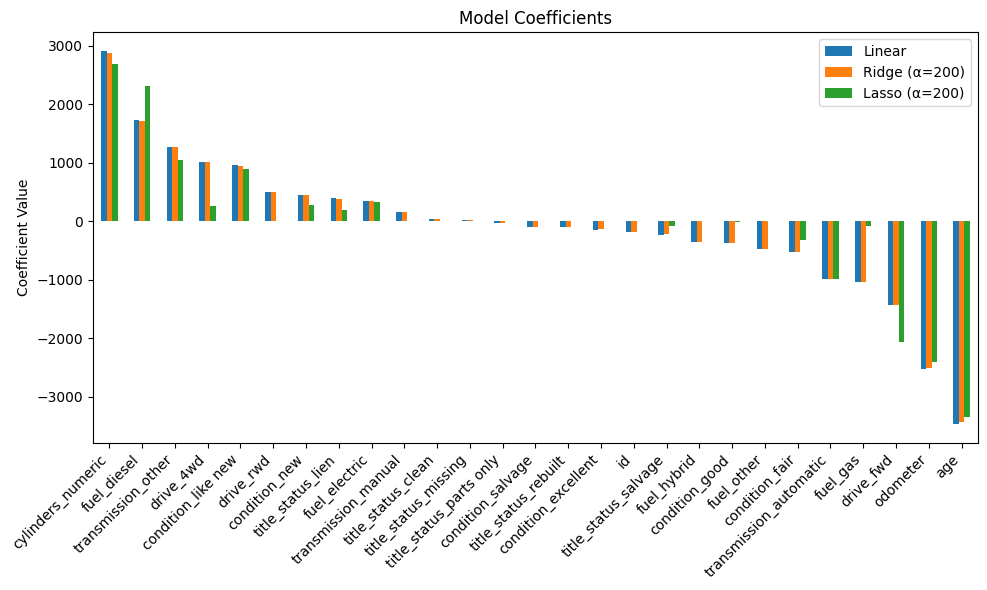

In [ ]:
# create a df
coef_df = pd.DataFrame(
    {name: np.ravel(res['Coefficients']) for name, res in results.items()},
    #index=['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']
    index = X_train.columns.tolist()
)

# sort the reults
coef_df = coef_df.sort_values(by = "Linear", ascending = False)

# plot the results
coef_df.plot(kind='bar', figsize=(10, 6), title='Model Coefficients')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("images/coefficients_alpha100.png", dpi=300)
plt.show()

In [ ]:
coef_df.round(3)

Linear  Ridge (α=100)  Lasso (α=100)
cylinders_numeric        2910.988       2892.915       2796.148
fuel_diesel              1732.003       1727.649       2388.311
transmission_other       1265.050       1265.235       1083.241
drive_4wd                1009.100       1010.136        317.279
condition_like new        957.473        955.520        971.215
drive_rwd                 501.332        501.425         -0.000
condition_new             447.466        446.685        375.744
title_status_lien         392.494        391.588        286.777
fuel_electric             353.523        350.315        435.558
transmission_manual       162.370        158.501          0.000
title_status_clean         41.915         41.669          0.000
title_status_missing       16.865         15.907          0.000
title_status_parts only   -34.978        -35.230         -0.000
condition_salvage         -88.040        -88.752         -5.383
title_status_rebuilt      -91.415        -91.210        -31.751
condition_excellent      -139.263       -138.426          0.000
id                       -187.022       -187.083        -87.449
title_status_salvage     -226.536       -225.452       -170.171
fuel_hybrid              -360.720       -360.080          0.000
condition_good           -367.490       -366.730       -125.827
fuel_other               -476.490       -471.129         -0.000
condition_fair           -524.339       -525.265       -399.541
transmission_automatic   -992.759       -989.932      -1096.194
fuel_gas                -1040.630      -1039.293        -97.924
drive_fwd               -1428.760      -1429.885      -2054.911
odometer                -2514.427      -2505.883      -2459.554
age                     -3466.302      -3448.561      -3405.073

In [ ]:
corr = df.corr(numeric_only = True).round(2)
corr

id  price  year  odometer
id        1.00  -0.00 -0.06      0.01
price    -0.00   1.00 -0.00      0.01
year     -0.06  -0.00  1.00     -0.16
odometer  0.01   0.01 -0.16      1.00

# Finding Optimal HyperValue Parameter for Lasso

Optimal Alpha Value for lasso is: 0.001. This is close to linear Regression result. Because if we choose Alpha as 0 it is as close to Linear Regression

In [ ]:
alphas = np.linspace(0.001, 100, num=100)
alphas

array([1.00000000e-03, 1.01109091e+00, 2.02118182e+00, 3.03127273e+00,
       4.04136364e+00, 5.05145455e+00, 6.06154545e+00, 7.07163636e+00,
       8.08172727e+00, 9.09181818e+00, 1.01019091e+01, 1.11120000e+01,
       1.21220909e+01, 1.31321818e+01, 1.41422727e+01, 1.51523636e+01,
       1.61624545e+01, 1.71725455e+01, 1.81826364e+01, 1.91927273e+01,
       2.02028182e+01, 2.12129091e+01, 2.22230000e+01, 2.32330909e+01,
       2.42431818e+01, 2.52532727e+01, 2.62633636e+01, 2.72734545e+01,
       2.82835455e+01, 2.92936364e+01, 3.03037273e+01, 3.13138182e+01,
       3.23239091e+01, 3.33340000e+01, 3.43440909e+01, 3.53541818e+01,
       3.63642727e+01, 3.73743636e+01, 3.83844545e+01, 3.93945455e+01,
       4.04046364e+01, 4.14147273e+01, 4.24248182e+01, 4.34349091e+01,
       4.44450000e+01, 4.54550909e+01, 4.64651818e+01, 4.74752727e+01,
       4.84853636e+01, 4.94954545e+01, 5.05055455e+01, 5.15156364e+01,
       5.25257273e+01, 5.35358182e+01, 5.45459091e+01, 5.55560000e+01,
      

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.667e+10, tolerance: 3.334e+08

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.674e+10, tolerance: 3.334e+08



Optimal Alpha Value for lasso is: 100.0


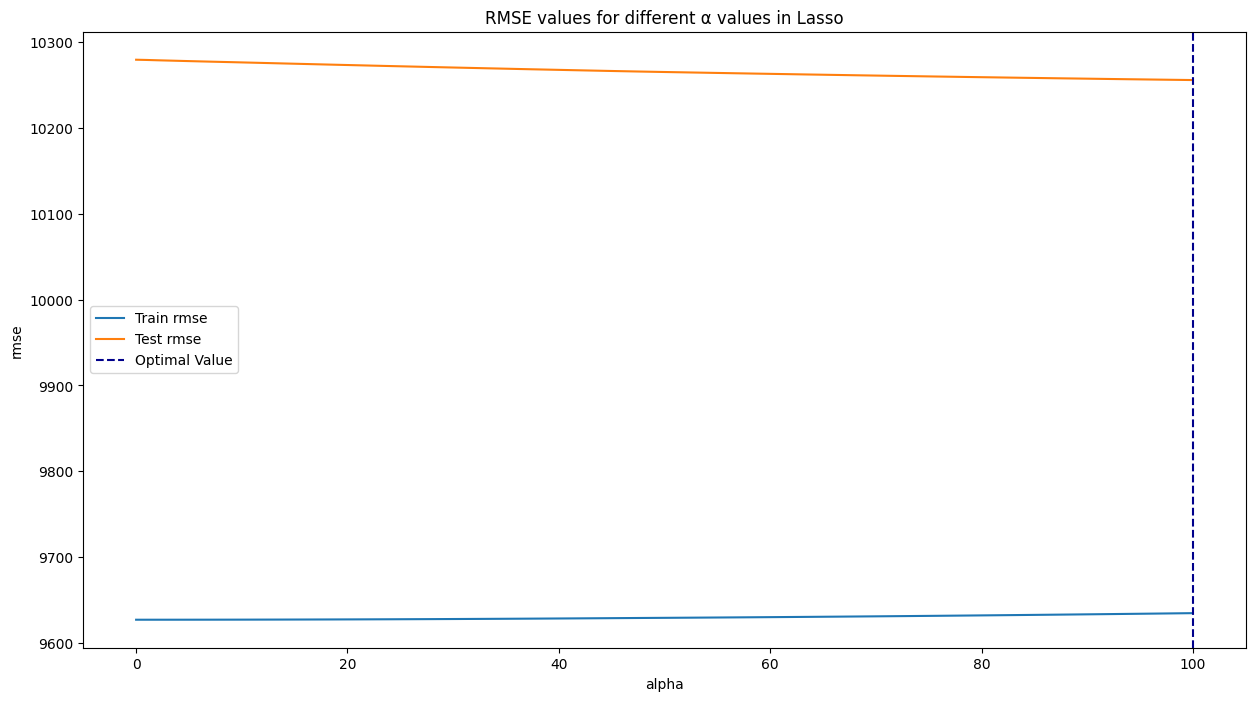

In [ ]:
train_rmse = []
test_rmse = []

for alpha in alphas:
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_train_scaled, y_train)

    train_preds = lasso.predict(X_train_scaled)
    train_rmse.append(root_mean_squared_error(y_train, train_preds))

    test_preds = lasso.predict(X_test_scaled)
    test_rmse.append(root_mean_squared_error(y_test, test_preds))

plt.figure(figsize = (15,8))
plt.plot(alphas, train_rmse, label='Train rmse')
plt.plot(alphas, test_rmse, label='Test rmse')
plt.title("RMSE values for different α values in Lasso")
plt.xlabel('alpha')
plt.ylabel('rmse')
plt.legend()

# np.argmin() returns the index of the minimum value in a list
optimal_alpha = alphas[np.argmin(test_rmse)]

# Add a vertical line where the test rmse is minimized
plt.axvline(optimal_alpha, color='darkblue', linestyle='--', label = "Optimal Value")
plt.legend();

print(f'Optimal Alpha Value for lasso is: {float(optimal_alpha)}')

# Finding the Optimal Hypervalue Parameter for Ridge

Optimal Alpha Value for Ridge is: 0.001. This is close to linear Regression result. Because if we choose Alpha as 0 it is as close to Linear Regression

In [ ]:
alphas = np.linspace(0.001, 50, num=50)
alphas

array([1.00000000e-03, 1.02138776e+00, 2.04177551e+00, 3.06216327e+00,
       4.08255102e+00, 5.10293878e+00, 6.12332653e+00, 7.14371429e+00,
       8.16410204e+00, 9.18448980e+00, 1.02048776e+01, 1.12252653e+01,
       1.22456531e+01, 1.32660408e+01, 1.42864286e+01, 1.53068163e+01,
       1.63272041e+01, 1.73475918e+01, 1.83679796e+01, 1.93883673e+01,
       2.04087551e+01, 2.14291429e+01, 2.24495306e+01, 2.34699184e+01,
       2.44903061e+01, 2.55106939e+01, 2.65310816e+01, 2.75514694e+01,
       2.85718571e+01, 2.95922449e+01, 3.06126327e+01, 3.16330204e+01,
       3.26534082e+01, 3.36737959e+01, 3.46941837e+01, 3.57145714e+01,
       3.67349592e+01, 3.77553469e+01, 3.87757347e+01, 3.97961224e+01,
       4.08165102e+01, 4.18368980e+01, 4.28572857e+01, 4.38776735e+01,
       4.48980612e+01, 4.59184490e+01, 4.69388367e+01, 4.79592245e+01,
       4.89796122e+01, 5.00000000e+01])

Optimal Alpha Value for Ridge is: 50.0


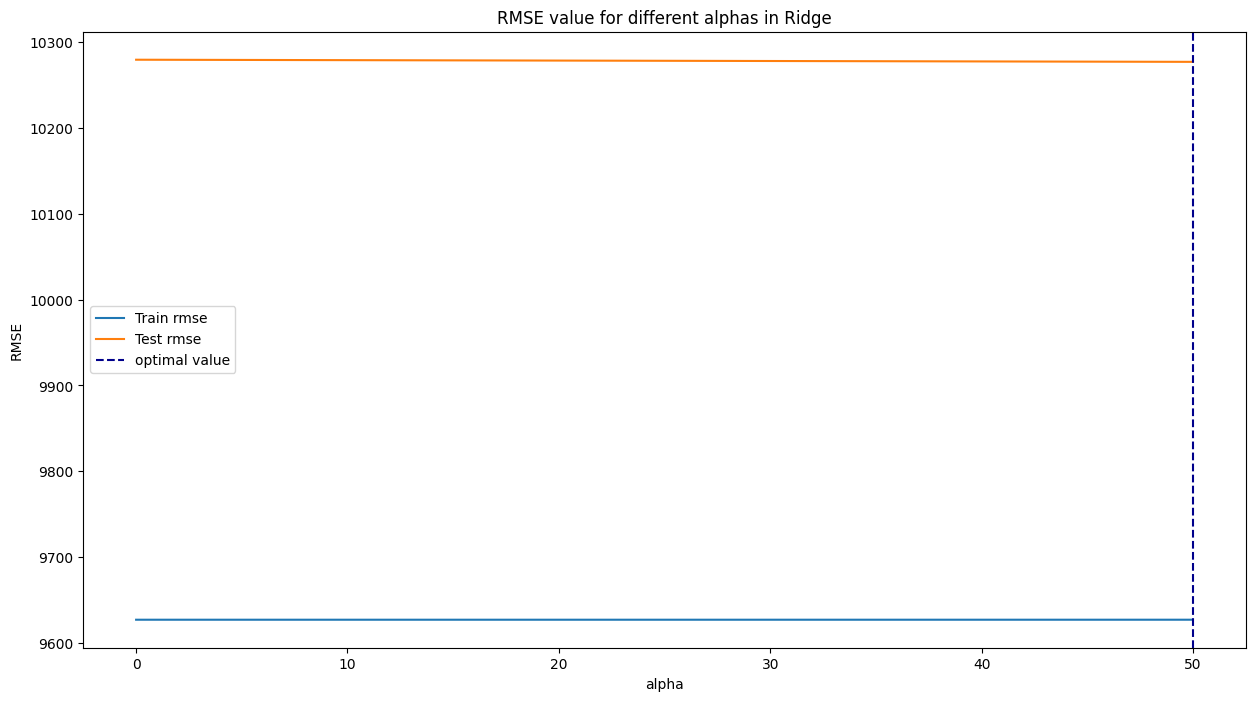

In [ ]:
ridge_train_rmse = []
ridge_test_rmse = []

for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train_scaled, y_train)

    train_preds = ridge.predict(X_train_scaled)
    ridge_train_rmse.append(root_mean_squared_error(y_train, train_preds))

    test_preds = ridge.predict(X_test_scaled)
    ridge_test_rmse.append(root_mean_squared_error(y_test, test_preds))


plt.figure(figsize = (15,8))
plt.plot(alphas, ridge_train_rmse, label='Train rmse')
plt.plot(alphas, ridge_test_rmse, label='Test rmse')

plt.title("RMSE value for different alphas in Ridge")
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.legend()

# np.argmin() returns the index of the minimum value in a list
optimal_alpha = alphas[np.argmin(test_rmse)]

# Add a vertical line where the test rmse is minimized
plt.axvline(optimal_alpha, color='darkblue', linestyle='--', label = "optimal value")
plt.legend();


print(f'Optimal Alpha Value for Ridge is: {float(optimal_alpha)}')

# Ridge and GridSearch CV -

Use GridSearch CV to recommend us the right alpha value to fit the Training and Test Data

**Alpha values recommended by GridSearch CV for Ridge is 20**

In [ ]:
ridge_alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 0, 0.001, 0.005, 0.1, 0.5, 1, 5, 10, 20, 100, 200]
# dictionary
parameters = {'alpha': ridge_alpha}
ridge = Ridge()

# Gridsearch model
ridge_grid = GridSearchCV(ridge, parameters,scoring='neg_mean_squared_error', cv=5, verbose = 3, n_jobs = -1, return_train_score=True)

**Fit the models**

In [ ]:
ridge_grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 17 candidates, totalling 85 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 0,
                                   0.001, 0.005, 0.1, 0.5, 1, 5, 10, 20, 100,
                                   200]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

In [ ]:
ridge_grid.best_params_

{'alpha': 200}

In [ ]:
ridge_results = pd.DataFrame(ridge_grid.cv_results_).sort_values(by = 'rank_test_score')

In [ ]:
ridge_results.head(5).round(4)[["param_alpha","mean_test_score", "rank_test_score", "mean_train_score"]].round(4).astype('int')

param_alpha  mean_test_score  rank_test_score  mean_train_score
16          200       -103103035                1         -91875705
15          100       -103390258                2         -91871793
14           20       -103630339                3         -91870514
13           10       -103661015                4         -91870473
12            5       -103676409                5         -91870463

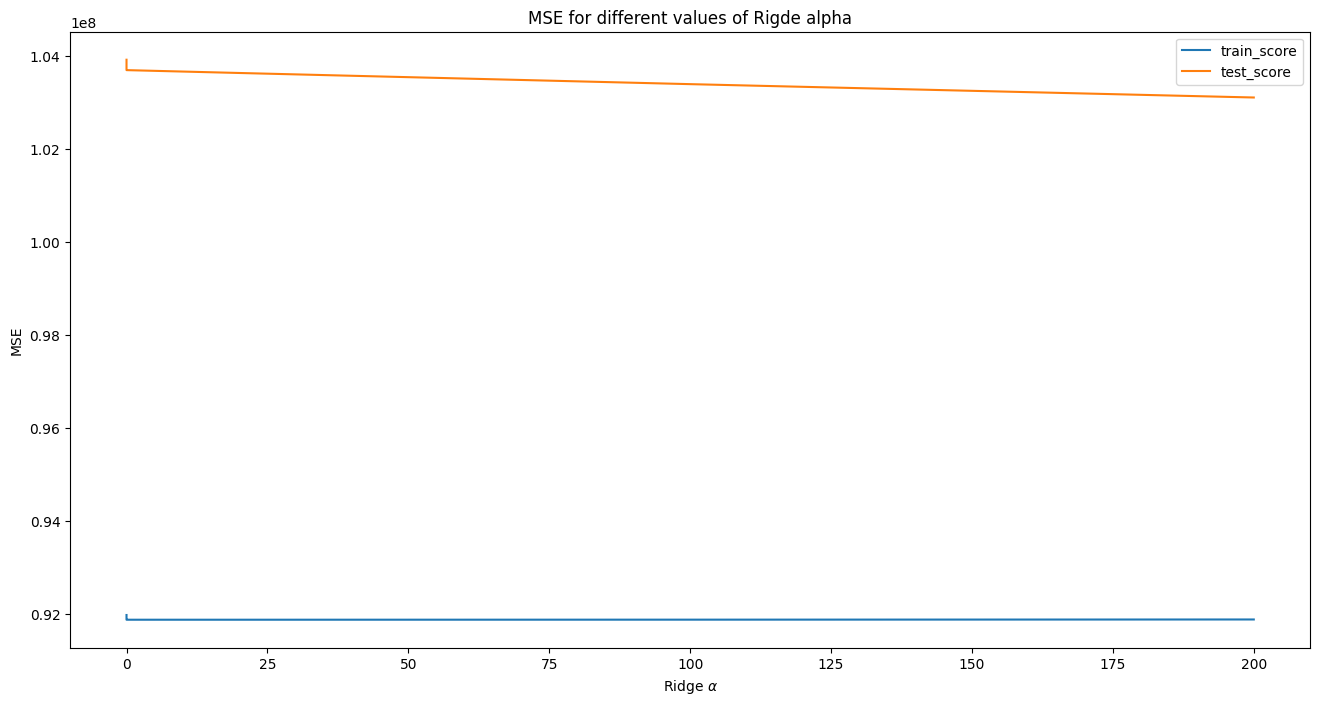

In [ ]:
plt.figure(figsize=(16,8))

# Remember, we need to do np.abs() of train and test score as they are negative in gridsearch CV
plt.plot(ridge_results['param_alpha'],np.abs(ridge_results['mean_train_score']), label = 'train_score')
plt.plot(ridge_results['param_alpha'],np.abs(ridge_results['mean_test_score']), label = 'test_score')

# plt.xscale('log')
plt.ylabel('MSE')
plt.xlabel('Ridge $α$')
plt.title("MSE for different values of Rigde alpha")
plt.legend()
plt.show()

# Lasso with GridSearch CV

Use GridSearch CV to recommend us the right alpha value to fit the Training and Test Data

**Alpha values recommended by GridSearch CV for Lasso is 5**

In [ ]:
lasso_alpha= [0, 1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 0.001, 0.005, 0.1, 0.5, 1, 5, 10, 20, 100, 200]

lasso = Lasso()

parameters = {'alpha': lasso_alpha}

lasso_grid = GridSearchCV(lasso, parameters,scoring ='neg_mean_squared_error', cv= 5, verbose = 3, n_jobs = -1, return_train_score=True)

In [ ]:
lasso_grid

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0, 1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.001,
                                   0.005, 0.1, 0.5, 1, 5, 10, 20, 100, 200]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

In [ ]:
lasso_grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0, 1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.001,
                                   0.005, 0.1, 0.5, 1, 5, 10, 20, 100, 200]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

In [ ]:
lasso_grid.best_params_

{'alpha': 200}

In [ ]:
lasso_results = pd.DataFrame(lasso_grid.cv_results_).sort_values(by = 'rank_test_score')

In [ ]:
lasso_results.head(6).round(4)[["param_alpha","mean_test_score", "rank_test_score", "mean_train_score"]].round(4).astype('int')

param_alpha  mean_test_score  rank_test_score  mean_train_score
15          200       -102932369                1         -92400129
14          100       -103148899                2         -92023086
13           20       -103559662                3         -91877755
12           10       -103623675                4         -91872331
11            5       -103657601                5         -91870935
10            1       -103685603                6         -91870479

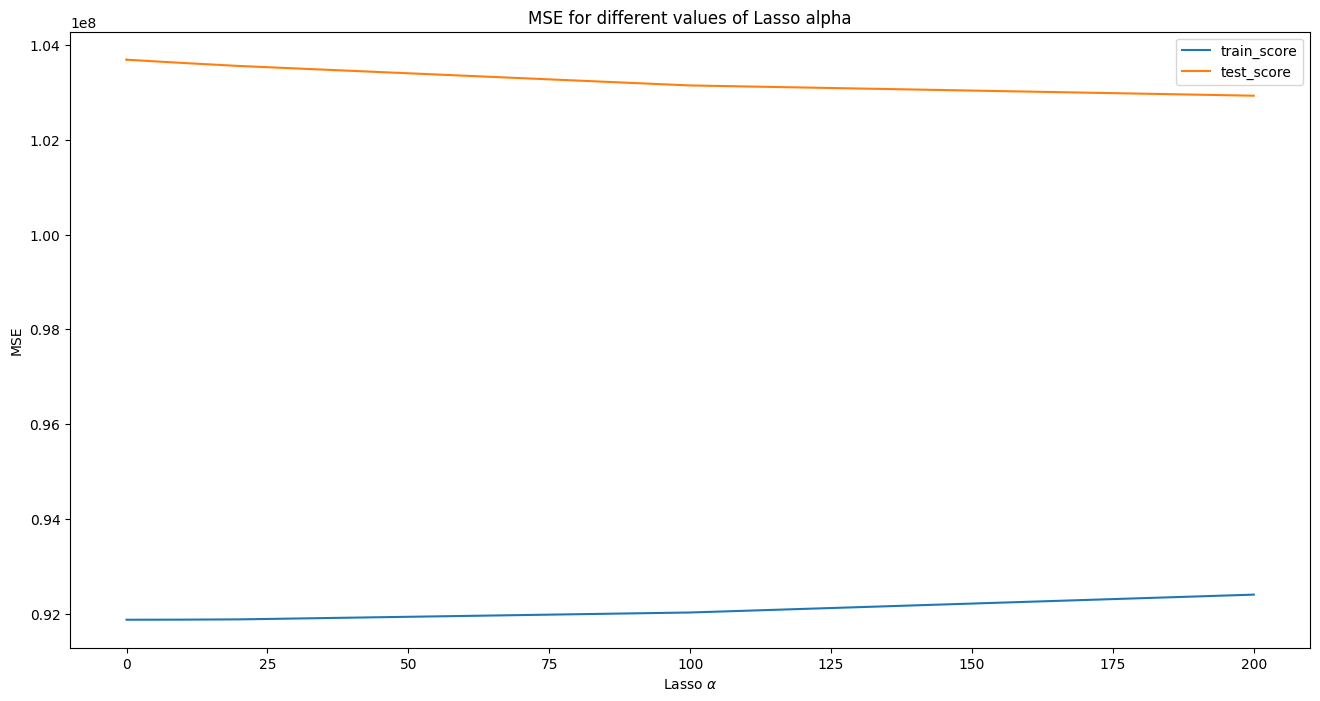

In [ ]:
plt.figure(figsize=(16,8))

# Remember, we need to do np.abs() of train and test score as they are negative in gridsearch CV
plt.plot(lasso_results['param_alpha'],np.abs(lasso_results['mean_train_score']), label = 'train_score')
plt.plot(lasso_results['param_alpha'],np.abs(lasso_results['mean_test_score']), label = 'test_score')


plt.ylabel('MSE')
plt.xlabel('Lasso $α$')
plt.title("MSE for different values of Lasso alpha")
plt.legend()
plt.show()

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

**Model Evaulation:**

For a Polynomial Transformer value of **Degree 3**, after standardizing the data, Here are some of the scearnios being tested.

**When Alpha =1 **, Linear Ridge and Lasso Model perform very close. You can refer to images/Alpha1.png to review the results. As the hypermeter value is very low, they coefficient standardizations is very low and hence they perform the same as linear regression models. Refer to images/rmse_train_vs_test_alpha1 results

**When Alpha = 20**, We can notice that Ridge and Linear perform very close however the Lasso model performs well on the Test set which is the unseen data.  Refer to images/Alpha20.png and images/ rmse_train_vs_test_alpha20 results.

**When Alpha = 200**, we can see that Lasso Model performs well with car ranges in the 7000 while Ridge performs better in the range of 1000 and 9000.  The RMSE results show that the Ridge model performs better overall in this alpha hyper parameter range.

**Grid Search CV model** for the data set returns 50 as a optimal value for Alpha for Ridge and 200 for Lasso, that was basically also confirmed with the scenarios explained above.

In **Conclusion**, based on the above results, the models perform better at various hyperparameter value range. Finding Optimal value of the Hyperparameter through Grid Search helps us to use them with the relevant models to make it perform better.  It was also identified that the Lasso and Ridge models penalize the features either bringing closer to zero or completely zero to determinate the non-linear relationship deriving from the linear regression model

Extracting the Coefficients that was used by the models, when they are at their optimal alpha ranges, prove that **Condition, Transmission, Fuel, Type, Year and Odometer** drive the price of the car